In [5]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df1 = DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':range(7)})
df2 = DataFrame({'key' : ['a','b','d'], 'data1':range(3)})

print(df2)
print(pd.merge(df1, df2, how='inner'))

print(pd.merge(df1, df2, on='key'))
print(pd.merge(df1, df2, left_on='key', right_on='key'))
print(pd.merge(df1, df2, how='outer'))

  key  data1
0   a      0
1   b      1
2   d      2
  key  data1
0   b      1
  key  data1_x  data1_y
0   b        0        1
1   b        1        1
2   b        6        1
3   a        2        0
4   a        4        0
5   a        5        0

  key  data1_x  data1_y
0   b        0        1
1   b        1        1
2   b        6        1
3   a        2        0
4   a        4        0
5   a        5        0
  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
7   a      0
8   d      2


In [95]:
data=DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio', 'Cololado'], name='state'), 
               columns=pd.Index(['one', 'two', 'three'],name='number'))
print(data)
result=data.stack()
print("분리")
print(result)
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Cololado    3    4      5
분리
state     number
Ohio      one       0
          two       1
          three     2
Cololado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Cololado    3    4      5


In [12]:
data = DataFrame({'k1':['one']*3 + ['two']*4, 
                'k2':[1, 1, 2, 3, 3, 4, 4]})
print(data)
print()
print(data.duplicated())
print()

data.drop_duplicates()
data['v1'] = range(7)
print(data.drop_duplicates(['k1']))
print()
print(data.drop_duplicates(['k1','k2'], keep='last'))

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

    k1  k2  v1
0  one   1   0
3  two   3   3

    k1  k2  v1
1  one   1   1
2  one   2   2
4  two   3   4
6  two   4   6


In [13]:
data = Series([1., -999., 2., -999., -1000., 3.])
print(data)
print(data.replace(-999, np.nan))
print(data.replace([-999, -1000],np.nan))
print(data.replace([-999, -1000], [np.nan, 0]))
print(data.replace({-999:np.nan, -1000:0}))

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [14]:
np.random.seed(12345)
data = DataFrame(np.random.randn(100,4))
data.describe()
col = data[3]
col[np.abs(col) > 3]
data[(np.abs(data) > 3).any(1)]
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-0.142766,0.099733,0.060532,-0.085898
std,0.995497,0.918984,1.050212,1.070339
min,-2.557934,-1.860761,-2.644409,-2.420294
25%,-0.788723,-0.571684,-0.699515,-0.773203
50%,-0.256996,0.111051,0.064969,-0.230874
75%,0.637665,0.711930,0.730487,0.624688
max,2.212303,2.613999,3.000000,3.000000


In [ ]:
# 첫번째 컬럼의 이름을 ID_area로 지정

regions	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


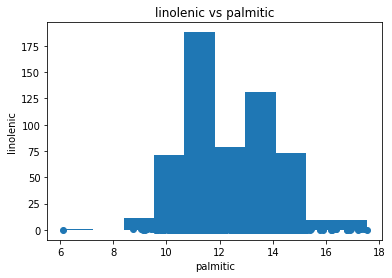

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'olive.csv'
df = pd.read_csv(path)
df.dtypes
df.describe()
df.rename(columns={df.columns[0]:'ID_area'}, inplace=True)
df.columns
df.head()

print('regions\t', df.region.unique())
print('areas\t', df.area.unique())

pd.crosstab(df.area, df.region)

df.head()

df["ID_area"] = df["ID_area"].apply(lambda x: x.split('.')[1])
df.head()
df["ID_area"].unique()

acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[acidlist]
dfsub.head()

dfsub = df[acidlist].apply(lambda x: x/100.0)
dfsub.head()
df[acidlist] = dfsub
df.head()

fig = plt.figure()
plt.scatter(df['palmitic'], df['linolenic'])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

plt.hist(df['palmitic'])

region_groupby = df.groupby(['region'])
region_groupby
region_groupby.head()
dfrd = region_groupby.describe()
dfrd.head(10)

region_groupby.mean()
region_groupby.apply(lambda x: x.mean())
region_groupby.std()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'sales-funnel.xlsx'
df = pd.read_excel(path)

df['Status'] = df['Status'].astype('category')
df['Status'].cat.set_categories(['won', 'pending', 'presented', 'declined'], inplace = True)
pd.pivot_table(df, index=['Name'])


,Account,Price,Quantity
Name,,,
Barton LLC,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",737550.0,35000.0,1.000000
Herman LLC,141962.0,65000.0,2.000000
Jerde-Hilpert,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",307599.0,7000.0,3.000000
Keeling LLC,688981.0,100000.0,5.000000
Kiehn-Spinka,146832.0,65000.0,2.000000
Koepp Ltd,729833.0,35000.0,2.000000
Kulas Inc,218895.0,25000.0,1.500000


In [43]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [44]:
pd.pivot_table(df, index=['Manager','Rep'], values=["Price"], aggfunc = [np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [50]:
table = pd.pivot_table(df, index=['Manager','Status'], columns=['Product'], values=["Quantity", "Price"], aggfunc={"Quantity":len, "Price":np.sum}, fill_value = 0)
table

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  presented   30000           0       0    20000        1   
              pending     40000       10000       0        0        1   
              declined    70000           0       0        0        2   
              won         65000           0       0        0        1   
Fred Anderson presented   30000           0    5000    10000        1   
              pending         0        5000       0        0        0   
              declined    65000           0       0        0        1   
              won        165000        7000       0        0        2   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  presented           0       0        2  
              pending             2       0        0  
              declined            0       0        0  
              won                 0       0        0  
Fred Anderson presented           0       1        1  
              pending             1       0        0  
              declined            0       0        0  
              won                 1       0        0

In [51]:
table.query('Manager == ["Debra Henley"]')

Price                              Quantity  \
Product                   CPU Maintenance Monitor Software      CPU   
Manager      Status                                                   
Debra Henley presented  30000           0       0    20000        1   
             pending    40000       10000       0        0        1   
             declined   70000           0       0        0        2   
             won        65000           0       0        0        1   

                                                     
Product                Maintenance Monitor Software  
Manager      Status                                  
Debra Henley presented           0       0        2  
             pending             2       0        0  
             declined            0       0        0  
             won                 0       0        0

In [52]:
table.query('Status == ["pending","won"]')

Price                              Quantity  \
Product                   CPU Maintenance Monitor Software      CPU   
Manager       Status                                                  
Debra Henley  pending   40000       10000       0        0        1   
              won       65000           0       0        0        1   
Fred Anderson pending       0        5000       0        0        0   
              won      165000        7000       0        0        2   

                                                    
Product               Maintenance Monitor Software  
Manager       Status                                
Debra Henley  pending           2       0        0  
              won               0       0        0  
Fred Anderson pending           1       0        0  
              won               1       0        0

In [57]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('KOREA',   ['1원', '2원', '3원', '4원'])
))
d = DataFrame(table)

In [58]:
p = d.pivot(index='Item', columns='CType', values='USD')

In [59]:
# Original DataFrame: Access the USD cost of Item0 for Gold customers
print (d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)

# Pivoted DataFrame: Access the USD cost of Item0 for Gold customers
print (p[p.index=='Item0'].Gold.values)

['1$']
['1$']


In [60]:
p = d.pivot(index='Item', columns='CType')

In [61]:
# Original DataFrame: Access the USD cost of Item0 for Gold customers
print(d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)

# Pivoted DataFrame: p.USD gives a "sub-DataFrame" with the USD values only
print(p.USD[p.USD.index=='Item0'].Gold.values)

['1$']
['1$']


In [65]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1',  '2',  '3',  '4']),
    ('KOREA',   ['1원', '2원', '3원', '4원'])
))
d = DataFrame(table)
p = d.pivot(index='Item', columns='CType', values='USD')

ValueError: Index contains duplicate entries, cannot reshape

In [66]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('KOREA',   [1.1, 2.2, 3.3, 4.4])
))
d = DataFrame(table)
p = d.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.min)

In [67]:
# Row Multi-Index
row_idx_arr = list(zip(['r0', 'r0'], ['r-00', 'r-01']))
row_idx = pd.MultiIndex.from_tuples(row_idx_arr)

# Column Multi-Index
col_idx_arr = list(zip(['c0', 'c0', 'c1'], ['c-00', 'c-01', 'c-10']))
col_idx = pd.MultiIndex.from_tuples(col_idx_arr)

# Create the DataFrame
d = DataFrame(np.arange(6).reshape(2,3), index=row_idx, columns=col_idx)
d = d.applymap(lambda x: (x // 3, x % 3))

# Stack/Unstack
s = d.stack()
u = d.unstack()

- dataset.csv를 로딩하고 resident열과 position열을 출력하시오
- describe로 확인할 때 숫자 데이터인 것이 나타나지 않는 원인을 확인하시오
-  각 열의 데이터 타입을 확인하시오
-  price와 age의 데이터 타입이 숫자가 아니면 숫자 데이터로 변경하시오

In [177]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.strip()    
df[['resident', 'position']]

,resident,position
0,1,2
1,2,5
2,,4
3,4,4
4,5,5
5,3,
6,2,3
7,5,3
8,,5
9,2,3


In [178]:
df.describe()

,gender,survey
count,300.000000,300.000000
mean,1.420000,2.656667
std,0.545826,0.837333
min,0.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,3.000000
max,5.000000,5.000000


In [179]:
df.dtypes

resident    object
gender       int64
job         object
age         object
position    object
price       object
survey       int64
dtype: object

In [180]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')
df.fillna(0, inplace=True)

'''
df['age'] = df['age'].astype(str).str.strip()
df['age'].fillna(0, inplace=True)
df['age'] = pd.to_numeric(df['age'].astype('float'))
''

resident
gender
job
age
position
price
survey


"\ndf['age'] = df['age'].astype(str).str.strip()\ndf['age'].fillna(0, inplace=True)\ndf['age'] = pd.to_numeric(df['age'].astype('float'))\n"

In [181]:
df.dtypes

resident    float64
gender        int64
job         float64
age         float64
position    float64
price       float64
survey        int64
dtype: object

In [182]:
df.describe()

,resident,gender,job,age,position,price,survey
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.076667,1.420000,2.026667,38.836667,3.143333,7.876333,2.656667
std,1.540139,0.545826,0.891781,19.249028,1.686893,65.591985,0.837333
min,0.000000,0.000000,0.000000,0.000000,0.000000,-457.200000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,2.000000,4.000000,2.000000
50%,1.000000,1.000000,2.000000,41.000000,4.000000,5.200000,3.000000
75%,3.000000,2.000000,3.000000,55.000000,5.000000,6.200000,3.000000
max,5.000000,5.000000,3.000000,69.000000,5.000000,675.000000,5.000000


In [183]:
df.head()

,resident,gender,job,age,position,price,survey
0,1.0,1,1.0,26.0,2.0,5.1,1
1,2.0,1,2.0,54.0,5.0,4.2,2
2,0.0,1,2.0,41.0,4.0,4.7,4
3,4.0,2,0.0,45.0,4.0,3.5,2
4,5.0,1,3.0,62.0,5.0,5.0,1


In [184]:
df

,resident,gender,job,age,position,price,survey
0,1.0,1,1.0,26.0,2.0,5.1,1
1,2.0,1,2.0,54.0,5.0,4.2,2
2,0.0,1,2.0,41.0,4.0,4.7,4
3,4.0,2,0.0,45.0,4.0,3.5,2
4,5.0,1,3.0,62.0,5.0,5.0,1
5,3.0,1,2.0,57.0,0.0,5.4,2
6,2.0,2,1.0,36.0,3.0,4.1,4
7,5.0,1,2.0,0.0,3.0,675.0,4
8,0.0,1,1.0,56.0,5.0,4.4,3
9,2.0,1,2.0,37.0,3.0,4.9,3
